In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
# Database path stored 
database_path = "../Resources/hawaii.sqlite"

In [11]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

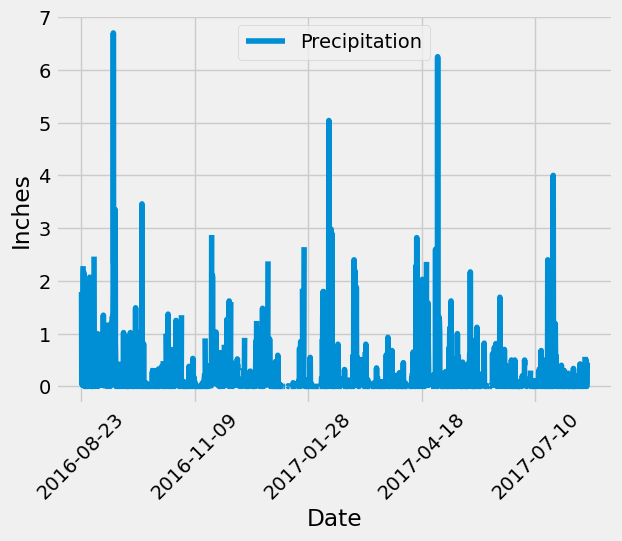

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
previous_date = dt.date(2017,8,23)-dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
filter_dates_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_prcp_df = pd.DataFrame(filter_dates_prcp, columns= ["Date", "Precipitation"])

# Sort the dataframe by date
query_prcp_df = query_prcp_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
query_prcp_df.plot(x = "Date", y = "Precipitation", rot = 45,)
plt.ylabel("Inches")


In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
query_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
# Notes: Using the func.count
Number_count = session.query(func.count(Measurement.station)).first()
Number_count

(19550,)

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Note: using func.min/max/avg of tobs and filter by stations == USC = [(54.0, 85.0, 71.66378066378067)]
active_station_temps = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
station_temps_df = pd.DataFrame(active_station_temps)
min_temp = station_temps_df.min()
max_temp = station_temps_df.max()
avg_temp = station_temps_df.mean()
print(f"USC00519281 temp min: {min_temp}") 
print(f"USC00519281 temp max: {max_temp}")
print(f"USC00519281 temp avg: {avg_temp}")

USC00519281 temp min: tobs    54.0
dtype: float64
USC00519281 temp max: tobs    85.0
dtype: float64
USC00519281 temp avg: tobs    71.663781
dtype: float64


<Axes: ylabel='Frequency'>

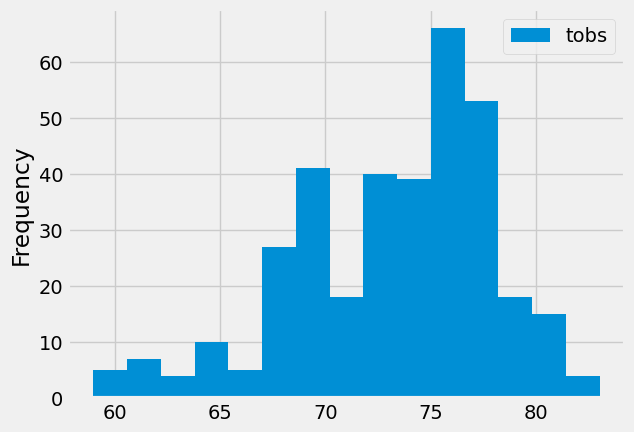

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
previous_date = dt.date(2017,8,23)-dt.timedelta(days = 365)
previous_12_months_temp = session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date >= previous_date)).all()
previous_12_months_temp_df = pd.DataFrame(previous_12_months_temp)
# plot histogram
previous_12_months_temp_df.plot.hist(bins = 15)

# Close Session

In [36]:
# Close Session
session.close()